In [1]:
import numpy as np
# import cv2 as cv
import matplotlib.pyplot as plt
import math

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

from kivy.interactive import InteractiveLauncher
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.graphics import Line
# from kivy.config import Config



[INFO   ] [Logger      ] Record log in /Users/ahish/.kivy/logs/kivy_19-12-29_26.txt
[INFO   ] [Kivy        ] v1.11.1
[INFO   ] [Kivy        ] Installed at "/Users/ahish/epicircle/lib/python3.6/site-packages/kivy/__init__.py"
[INFO   ] [Python      ] v3.6.6 (v3.6.6:4cf1f54eb7, Jun 26 2018, 19:50:54) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
[INFO   ] [Python      ] Interpreter at "/usr/local/Cellar/python/3.7.6/bin/python3.7"
[INFO   ] [Factory     ] 184 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_sdl2, img_gif (img_pil, img_ffpyplayer ignored)
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL ES 2" graphics system
[INFO   ] [GL          ] Backend used <sdl2>
[INFO   ] [GL          ] OpenGL version <b'2.1 ATI-2.11.20'>
[INFO   ] [GL          ] OpenGL vendor <b'ATI Technologies Inc.'>
[INFO   ] [GL          ] OpenGL renderer <b'AMD Radeon Pro 560 OpenGL Engine'>
[INFO   ] [GL          ] OpenGL parsed

In [2]:
# Config.set('graphics', 'width', '800')
# Config.set('graphics', 'height', '800')
pointsTouched = []

class DrawInput(Widget):

    def on_touch_down(self, touch):
        
        global pointsTouched
        with self.canvas:
            touch.ud["line"] = Line(points=(touch.x, touch.y))
            pointsTouched += [(int(touch.x/2), int(touch.y/2))]

    def on_touch_move(self, touch):
        
        global pointsTouched
        touch.ud["line"].points += (touch.x, touch.y)
        pointsTouched += [(int(touch.x/2), int(touch.y/2))]
        
class drawingBoard(App):

    def build(self):
        return DrawInput()

drawingBoard().run()
    

In [3]:
# settings
samplePercentage = 0.5 #percentage

In [4]:
sampledPoints = pointsTouched[::int(1/samplePercentage)]

In [5]:
#generate complex points
points = np.empty(len(sampledPoints), np.csingle)
for i in range(len(sampledPoints)):
    pair = sampledPoints[i]
    points[i] = complex(pair[0], pair[1])

In [6]:
N = len(sampledPoints)
points_fft = np.fft.fft(points, 2*N)

In [7]:
t = len(points)
generated_function = [0 for i in range(t)]

for tau in range(t):
    for k in range(len(points_fft)):
        
        # inverse fourier transform
        time = tau/2
        generated_function[tau] += points_fft[k]*(math.e**(1j*2*math.pi*k*time/N))
        

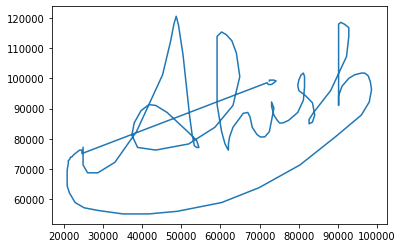

In [8]:
real = list(map(lambda x: x.real, generated_function))
imag = list(map(lambda x: x.imag, generated_function))

plt.plot(real, imag)
plt.show()

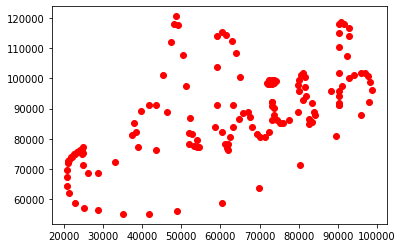

In [9]:
plt.scatter(real, imag, color='red')
plt.show()